# Emotion Detection

## Importing Libraries

In [12]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from glob import glob

# tensorflow module
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image

import cv2 as cv
import random
import os
%matplotlib inline



## Load the dataset

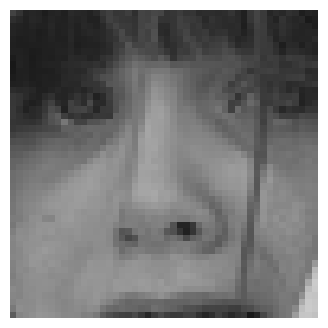

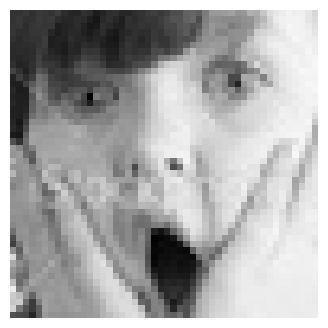

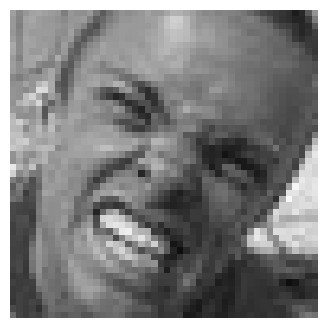

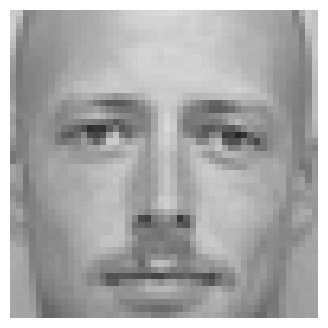

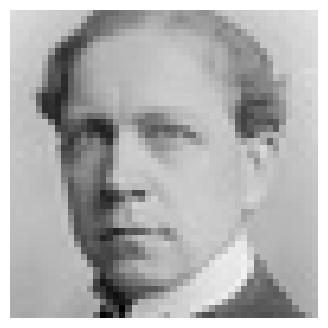

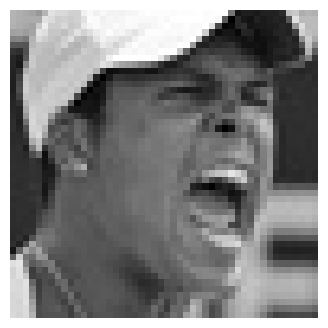

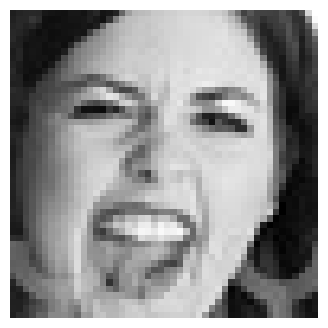

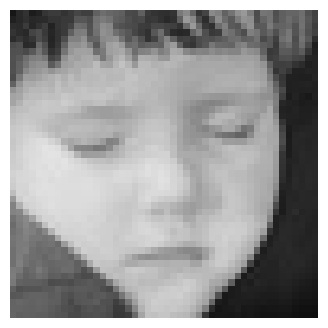

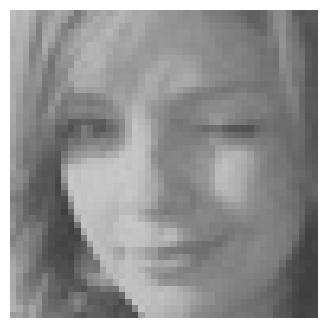

In [13]:
images = glob('/kaggle/input/fer2013/train/**/**')
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(4,4))
    plt.imshow(cv.imread(image));
    plt.axis('off')
    plt.show()
    
    
  

  

# Preparing data for training

In [14]:
img_size = 48 
batch_size =64
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_gen = datagen_train.flow_from_directory('/kaggle/input/fer2013/train/',
                                              target_size=(img_size,img_size),
                                              color_mode='grayscale',
                                              batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

datagen_valid = ImageDataGenerator(horizontal_flip=True)
valid_gen = datagen_valid.flow_from_directory('/kaggle/input/fer2013/test/',
                                              target_size=(img_size,img_size),
                                              color_mode='grayscale',
                                              batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Defining model

In [18]:
def convolution(input_tensor,filters,kernel_size):
    x  = Conv2D(filters = filters, kernel_size=kernel_size,padding='same')(input_tensor)
    x = BatchNormalization() (x)
    x = Activation('relu') (x)
    x = MaxPooling2D(pool_size=(2,2)) (x)
    x = Dropout(0.25) (x)

    return x
    

In [19]:
def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization() (x)
    x = Activation('relu') (x)
    x = Dropout(0.25) (x)

    return x

In [20]:
# def model_fer(input_shape):
#     inputs = Input(shape=input_shape)
    
#     con_1 = convolution(inputs,32,(3,3))
#     con_2 = convolution(inputs,64,(5,5))
#     con_3 = convolution(inputs,128,(3,3))

#     flatten = Flatten()(con_3)
#     dense_1 = Dense_f(flatten,256)
#     output = Dense(7,activation='softmax')(dense_1)
    
#     model = Model(inputs = [inputs],outputs = [output])
    
#     model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
#     return model
    

In [21]:
def model_fer(input_shape):
    inputs = Input(shape=input_shape)
    
    con_1 = convolution(inputs,64,(3,3))
    con_2 = convolution(con_1,128,(5,5))
    con_3 = convolution(con_2,256,(3,3))
    con_4 = convolution(con_3,512,(3,3))

    flatten = Flatten()(con_4)
    dense_1 = Dense_f(flatten,256)
    dense_2 = Dense_f(dense_1,512)
    
    output = Dense(7,activation='softmax')(dense_2)
    model = Model(inputs = [inputs],outputs = [output])
    
    opt = Adam(learning_rate=0.0005)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    
    return model
    

In [22]:
model = model_fer((48,48,1))
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0   

### Initializing the model

In [24]:
epochs = 15
steps_per_epochs = train_gen.n // train_gen.batch_size
validation_steps = valid_gen.n // valid_gen.batch_size

checkpoint = ModelCheckpoint('model_weights.h5',
                             monitor='val_accuracy',
                            save_weights_only=True,
                            mode='max',
                            verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001)
callbacks = [checkpoint,reduce_lr]
 

## Train the model

In [25]:
history = model.fit(
x = train_gen,
    steps_per_epoch=steps_per_epochs,
    epochs=epochs,validation_data=valid_gen,
validation_steps=validation_steps,
callbacks=callbacks)

Epoch 1/15


2023-12-24 05:30:53.245576: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


448/448 [==============================] - ETA: 0s - loss: 1.8072 - accuracy: 0.3052
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 163s 337ms/step - loss: 1.8072 - accuracy: 0.3052 - val_loss: 2.2944 - val_accuracy: 0.3143 - lr: 5.0000e-04
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.4911 - accuracy: 0.4272
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 28s 63ms/step - loss: 1.4911 - accuracy: 0.4272 - val_loss: 1.5062 - val_accuracy: 0.4383 - lr: 5.0000e-04
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.3445 - accuracy: 0.4824
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 27s 61ms/step - loss: 1.3445 - accuracy: 0.4824 - val_loss: 1.4187 - val_accuracy: 0.4701 - lr: 5.0000e-04
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.2602 - accuracy: 0.5190
Epoch 4: saving model to model_weights.h5
448/448

## Model evaluation

In [26]:
model.evaluate(valid_gen)

113/113 [==============================] - 5s 47ms/step - loss: 1.0299 - accuracy: 0.6109


[1.0298511981964111, 0.6108943819999695]

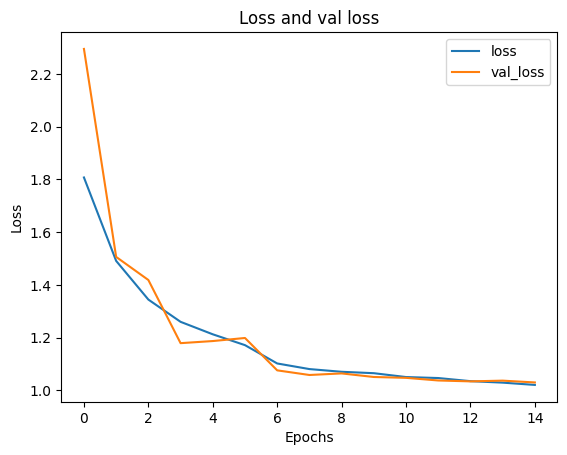

In [28]:
## Plotting Loss curve

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Loss and val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

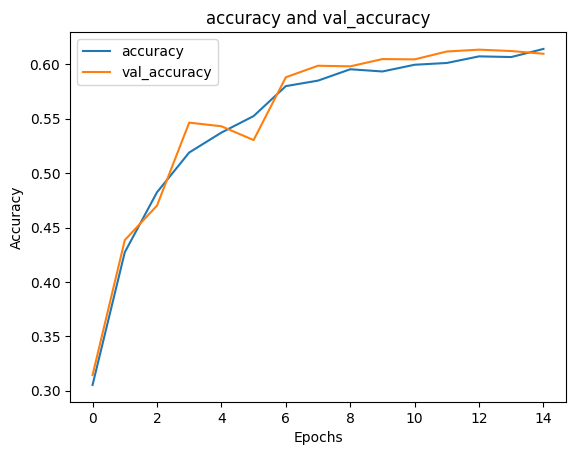

In [29]:
## Plotting accuracy curve

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy and val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Save the model

In [30]:
model_json = model.to_json()
with open('model_a.json','w') as json_file:
    json_file.write(model_json)